In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


In [4]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,136757.000000,1.367570e+05,136757.000000,136757.000000
mean,2024.374686,1.630432e+05,157490.722756,20.909716
std,0.679644,2.150435e+05,74173.546839,40.594326
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105900.000000,0.000000
50%,2024.000000,1.470000e+05,146000.000000,0.000000
75%,2025.000000,1.988000e+05,197800.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


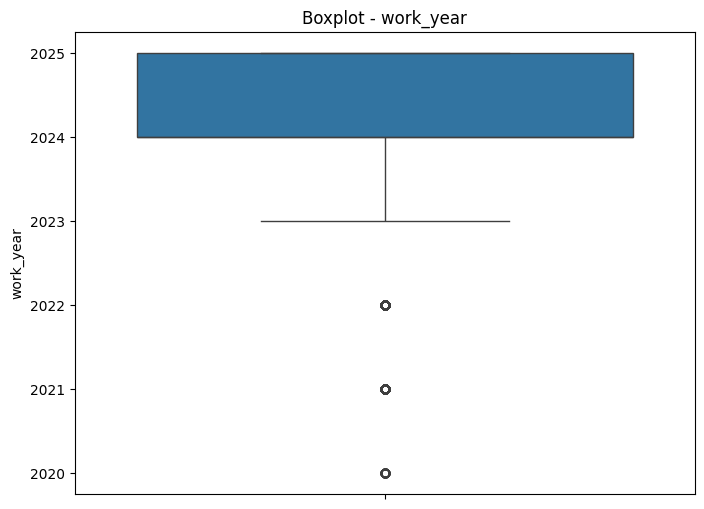

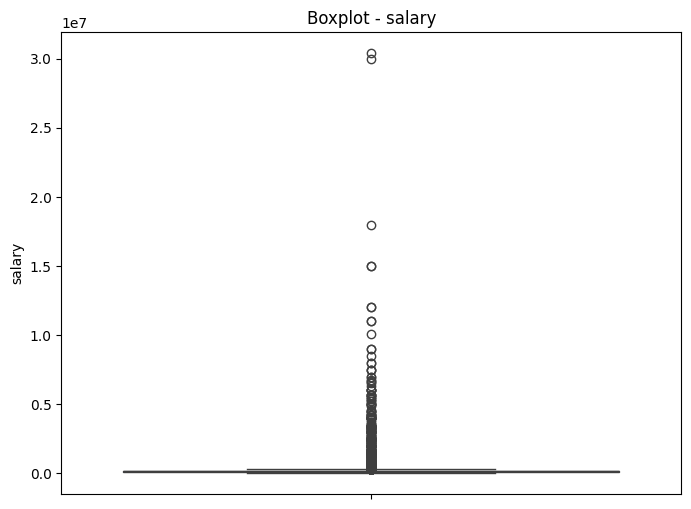

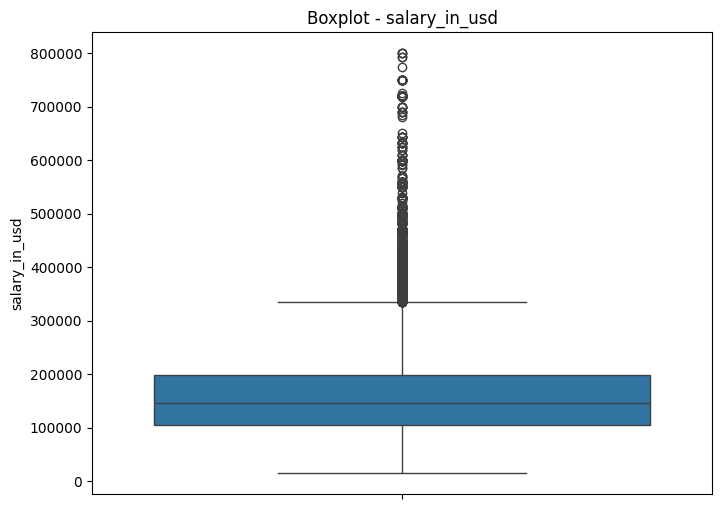

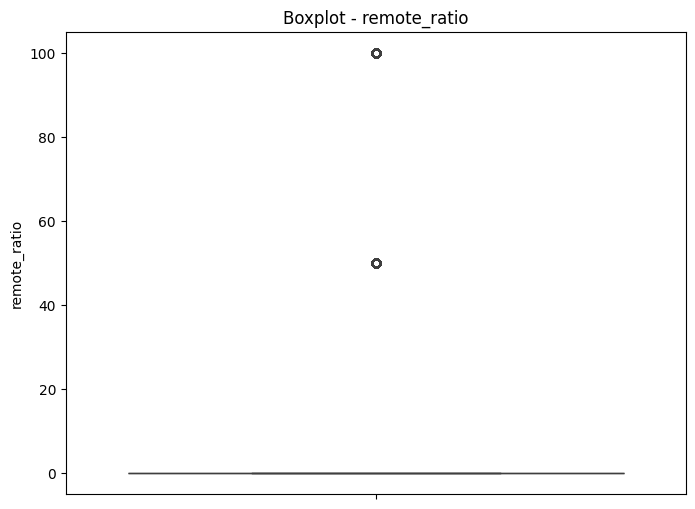

In [6]:
for coluna in df.columns:
  if df[coluna].dtype not in ['object']:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[coluna])
    plt.title(f'Boxplot - {coluna}')
    plt.show()

In [7]:
salary_cols = ['salary', 'salary_in_usd']

Q1 = df[salary_cols].quantile(0.25)
Q3 = df[salary_cols].quantile(0.75)
IQR = Q3 - Q1

limite_sup = Q3 + 1.5 * IQR
limite_inf = Q1 - 1.5 * IQR

df_no_outliers = df[(df['salary'] >= limite_inf['salary']) & (df['salary'] <= limite_sup['salary']) &
                    (df['salary_in_usd'] >= limite_inf['salary_in_usd']) & (df['salary_in_usd'] <= limite_sup['salary_in_usd'])]

df = df_no_outliers

/tmp/ipython-input-8-3731291363.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_per_experience, x='experience_level', y='salary_in_usd', palette='Blues_d')


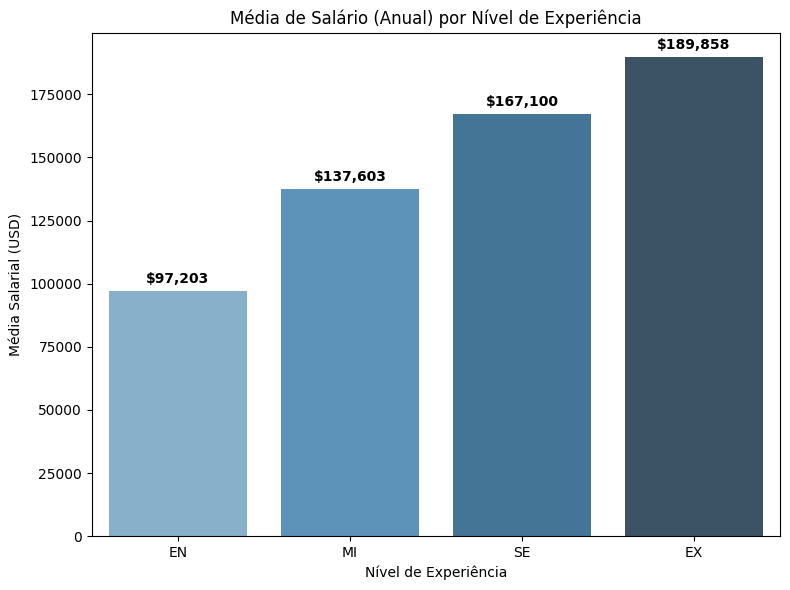

In [8]:
salary_per_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=salary_per_experience, x='experience_level', y='salary_in_usd', palette='Blues_d')

plt.title('Média de Salário (Anual) por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Média Salarial (USD)')
plt.xticks(rotation=0)

for i, valor in enumerate(salary_per_experience['salary_in_usd']):
    plt.text(i, valor + 2000, f'${valor:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
jobType = {
    100 : 'Remote',
    50: 'Hybrid',
    0: 'Presecial'
}

df['remote_ratio'] = df['remote_ratio'].map(jobType)

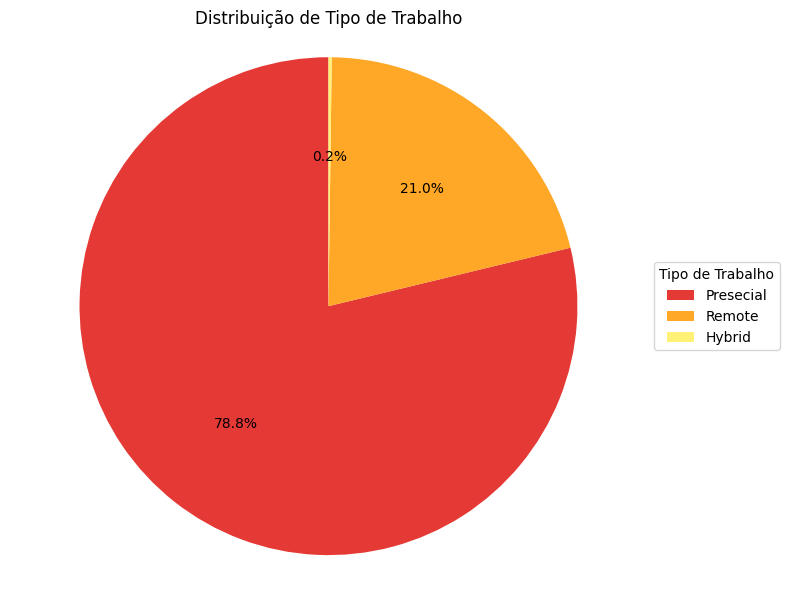

In [10]:
remote_ratio = df['remote_ratio'].value_counts()

colors = ['#e53935', '#ffa726', '#fff176']
labels = remote_ratio.index

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    remote_ratio,
    labels=[''] * len(labels),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

plt.legend(wedges, labels, title='Tipo de Trabalho', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribuição de Tipo de Trabalho')
plt.axis('equal')
plt.tight_layout()
plt.show()